In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

![database](https://i.imgur.com/HRhd2Y0.png)

In [2]:
df1 = pd.read_csv('ecommerce/olist_customers_dataset.csv')
df1.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [3]:
df1.shape

(99441, 5)

In [4]:
df2 = pd.read_csv('ecommerce/olist_orders_dataset.csv')
df2.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [5]:
df2.shape

(99441, 8)

In [6]:
df12 = df1.merge(df2, how='outer', on='customer_id')
df12.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00


In [7]:
df12.shape

(99441, 12)

In [8]:
df1['customer_unique_id'].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
e51e07cef993df6ce1e8604ba2261b5d     1
3dfa33e5348bd90b234a96f7294016d5     1
191e508e616b091863829ce8d0c7eab6     1
a24b992eef004eb002488fce9e3be44e     1
7996bd915a589defd554b7b16e7543f5     1
Name: customer_unique_id, Length: 96096, dtype: int64

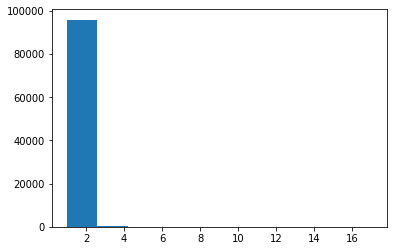

In [9]:
plt.hist(df1['customer_unique_id'].value_counts())
plt.show()

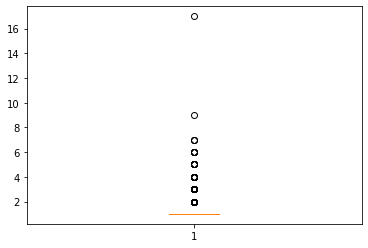

In [10]:
plt.boxplot(df1['customer_unique_id'].value_counts())
plt.show()

In [11]:
Counter(df1['customer_unique_id'].value_counts())

Counter({17: 1, 9: 1, 7: 3, 6: 6, 5: 8, 4: 30, 3: 203, 2: 2745, 1: 93099})

In [12]:
99441-93099

6342

In [13]:
df3 = pd.read_csv('ecommerce/olist_order_reviews_dataset.csv')
df3.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [14]:
df123 = df12.merge(df3, how='outer', on='order_id')
df123.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59


In [15]:
df123.isnull().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  161
order_delivered_carrier_date      1793
order_delivered_customer_date     2987
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title             88285
review_comment_message           58247
review_creation_date                 0
review_answer_timestamp              0
dtype: int64

In [16]:
df123.shape

(100000, 18)

In [17]:
df4 = pd.read_csv('ecommerce/olist_order_items_dataset.csv')
df4.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [18]:
df1234 = df123.merge(df4, how='outer', on='order_id')
df1234.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79


In [19]:
df1234.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value'],
      dtype='object')

In [20]:
df1234.shape

(114100, 24)

In [21]:
# getting the new dataframe which contains customers which has given more than 1 ratings
# df1234.groupby("customer_unique_id").filter(lambda x:x['review_score'].count() >1)

In [22]:
# getting the new dataframe which contains products which has had 50 or more ratings
df = df1234.groupby("product_id").filter(lambda x:x['review_score'].count() >=50)
df.shape

(18889, 24)

In [23]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value'],
      dtype='object')

# surprise!
following [this notebook](https://www.kaggle.com/saurav9786/recommender-system-using-amazon-reviews#Collaberative-filtering-(Item-Item-recommedation)) on kaggle and the [documentation](https://surprise.readthedocs.io/en/stable/getting_started.html)

In [24]:
df = df[['customer_unique_id', 'product_id', 'review_score']]
#df.to_csv('recommender.csv')
df.head(3)

,customer_unique_id,product_id,review_score
0,861eff4711a542e4b93843c6dd7febb0,a9516a079e37a9c9c36b9b78b10169e8,4
9,9afe194fb833f79e300e37e580171f22,78efe838c04bbc568be034082200ac20,5
18,7f3a72e8f988c6e735ba118d54f47458,99a4788cb24856965c36a24e339b6058,3


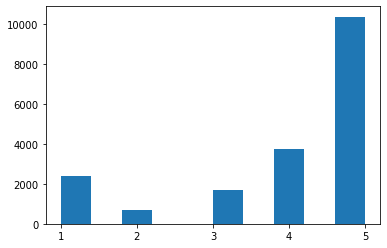

In [25]:
plt.hist(df['review_score'])
plt.xticks([1,2,3,4,5])
plt.show()

In [26]:
# reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df, reader)

In [27]:
# splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3, random_state=10)

### item-based

In [28]:
# use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [29]:
# run the trained model against the testset
test_pred = algo.test(testset)
#test_pred

In [30]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.2124


1.2123907430521894

In [31]:
accuracy.mse(test_pred, verbose=True)

MSE: 1.4699


1.4698913138386398

In [32]:
accuracy.mae(test_pred, verbose=True)

MAE:  0.8776


0.8776054738944616

In [33]:
len(test_pred)

5667

In [34]:
count = 0
for i in range(len(test_pred)):
    if test_pred[i][4]['was_impossible'] == True:
        count += 1
count

4656

In [35]:
4656/5667

0.8215987294865008

In [36]:
df

,customer_unique_id,product_id,review_score
0,861eff4711a542e4b93843c6dd7febb0,a9516a079e37a9c9c36b9b78b10169e8,4
9,9afe194fb833f79e300e37e580171f22,78efe838c04bbc568be034082200ac20,5
18,7f3a72e8f988c6e735ba118d54f47458,99a4788cb24856965c36a24e339b6058,3
20,e607ede0e63436308660236f5a52da5e,130482add9fd75ccb6c57ba007694a2d,5
21,a96d5cfa0d3181817e2b946f921ea021,368c6c730842d78016ad823897a372db,1
...,...,...,...
114028,a10c0d1e68e919e3d91ed940a0ba6aed,43423cdffde7fda63d0414ed38c11a73,2
114083,206e64e8af2633a2ebe158a7fcb860db,35afc973633aaeb6b877ff57b2793310,1
114085,4452b8ef472646c4cc042cb31a291f3b,5d66715cc928aadd0074f61332698593,4
114089,277490f0d435b602fe4475d4b89e9181,99a4788cb24856965c36a24e339b6058,5


### user-based

In [37]:
# use user_based true/false to switch between user-based or item-based collaborative filtering
algo2 = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo2.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [38]:
# run the trained model against the testset
test_pred2 = algo2.test(testset)
#test_pred2

In [39]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred2, verbose=True)

Item-based Model : Test Set
RMSE: 1.2052


1.2051953085409994

In [40]:
accuracy.mae(test_pred2, verbose=True)

MAE:  0.8681


0.8681141577161164

### model-based (item)

In [41]:
ratings_matrix = df.pivot_table(values='review_score', index='customer_unique_id', columns='product_id', fill_value=0)
ratings_matrix.head(3)

product_id,0152f69b6cf919bcdaf117aa8c43e5a2,054515fd15bc1a2029f10de97ffa9120,06c6e01186af8b98ee1fc9e01f9471e9,06edb72f1e0c64b14c5b79353f7abea3,08574b074924071f4e201e151b152b4e,0a57f7d2c983bcf8188589a5fea4a8da,0aabfb375647d9738ad0f7b4ea3653b1,0bcc3eeca39e1064258aa1e932269894,0d85c435fd60b277ffb9e9b0f88f927a,11875b30b49585209e608f40e8082e65,...,f35927953ed82e19d06ad3aac2f06353,f40876e0ef3cd5f9132b1f16b04b1346,f4f67ccaece962d013a4e1d7dc3a61f7,f71973c922ccaab05514a36a8bc741b8,f71f42e2381752836563b70beb542f80,f7a17d2c51d9df89a4f1711c4ac17f33,fb55982be901439613a95940feefd9ee,fbc1488c1a1e72ba175f53ab29a248e8,fbce4c4cb307679d89a3bf3d3bb353b9,fc1d8637c0268af3db482c14b7ef8e75
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
000ed48ceeb6f4bf8ad021a10a3c7b43,0.0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
001926cef41060fae572e2e7b30bd2a4,0.0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
00196c4c9a3af7dd2ad10eade69c926f,0.0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
ratings_matrix.shape

(16443, 176)

In [43]:
X1 = ratings_matrix.T
X1.head(3)

customer_unique_id,000ed48ceeb6f4bf8ad021a10a3c7b43,001926cef41060fae572e2e7b30bd2a4,00196c4c9a3af7dd2ad10eade69c926f,001ae5a1788703d64536c30362503e49,002ae492472e45ad6ebeb7a625409392,002bdeb33da5b1b3ce8b9c822f749c82,002cdf87d4c03f08f7eb4551a923affc,002d71b244beb91ca7030b15ab526446,002ed12115742033f015cb3c269ccf68,002ef00822613c94613e60e03b169fef,...,ffe6305176b9431a3eda3cf8904d7eb7,ffe6efca3c7e6a06bad0a6a883280a93,ffe96c782a5bc522bd8bad3bc638981a,ffe9be10b9a58c5464d833e8b1b2c632,ffe9e41fbd14db4a7361347c56af5447,ffee94d548cef05b146d825a7648dab4,ffeefd086fc667aaf6595c8fe3d22d54,fff1afc79f6b5db1e235a4a6c30ceda7,ffff5962728ec6157033ef9805bacc48,ffffd2657e2aad2907e67c3e9daecbeb
product_id,,,,,,,,,,,,,,,,,,,,,
0152f69b6cf919bcdaf117aa8c43e5a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
054515fd15bc1a2029f10de97ffa9120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06c6e01186af8b98ee1fc9e01f9471e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X1.shape

(176, 16443)

In [45]:
# decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X1)
decomposed_matrix.shape

(176, 10)

In [46]:
# correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(176, 176)

In [47]:
X1.index[75]

'6c3effec7c8ddba466d4f03f982c7aa3'

Index # of product ID purchased by customer

In [48]:
i = X1.index[75]

product_names = list(X1.index)
product_ID = product_names.index(i)
product_ID

75

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [49]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(176,)

Recommending top 25 highly correlated products in sequence

In [50]:
Recommend = list(X1.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

['0aabfb375647d9738ad0f7b4ea3653b1',
 '0d85c435fd60b277ffb9e9b0f88f927a',
 '2a2d22ae30e026f1893083c8405ca522',
 '3eef0cb94ba82de806bb30ab743c7655',
 '4298b7e67dc399c200662b569563a2b2',
 '44a34214a57dc373dcd80f54c919d006',
 '5a848e4ab52fd5445cdc07aab1c40e48',
 '656e0eca68dcecf6a31b8ececfabe3e8',
 '73326828aa5efe1ba096223de496f596',
 '7e0dc102074f8285580c9777f79c90cf',
 '89b121bee266dcd25688a1ba72eefb61',
 'a9516a079e37a9c9c36b9b78b10169e8',
 'af51d485dc5255ba2e18b21b550156e6',
 'b5e13c9a353102f79c6206ff5cb61a50',
 'c4baedd846ed09b85f78a781b522f126',
 'cac9e5692471a0700418aa3400b9b2b1',
 'cd48f265a63e13b762601f5f794c5fca',
 'd017a2151d543a9885604dc62a3d9dcc',
 'd3c044bd42d84a79e3b0c42662806a48',
 'd5991653e037ccb7af6ed7d94246b249',
 'e59dd207c69d86e890febadc796d1078',
 'e9a69340883a438c3f91739d14d3a56d',
 'ee406bf28024d97771c4b1e8b7e8e219']

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.